### Homework 08

Name: Yining Liu  
Github Username: Lynzz1701    
USC ID: 6168529797 

### 1. Supervised, Semi-Supervised, and Unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import roc_auc_score, RocCurveDisplay, precision_recall_fscore_support, accuracy_score
from sklearn.svm import SVC, LinearSVC
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline

import os

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
WDBC = pd.read_csv('../data/wdbc.data',names=['ID','Diagnosis']+[i for i in range(1,31)])
X = WDBC.iloc[:,2:]
y = WDBC['Diagnosis']

#### 1(b)i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F1-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [134]:
#Supervised Learning: L1 Penalty SVM
accuracy_train_arr, precision_train_arr, recall_train_arr, fscore_train_arr, auc_train_arr = [], [], [], [], [] 
accuracy_test_arr, precision_test_arr, recall_test_arr, fscore_test_arr, auc_test_arr = [], [], [], [], []

for m in range(30):
    
    print("\n---- batch,", m+1, "----")
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=m, stratify=y)
    scaler = preprocessing.StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    #parameter selection
    parameters_l1 = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    svm = LinearSVC(penalty='l1', dual=False, max_iter=100000)
    clf = GridSearchCV(svm, parameters_l1, scoring='accuracy', cv=5, n_jobs=-1)
    clf.fit(X_train_normalized, y_train)
    best_svm = clf.best_estimator_
    print("  (L1 Penalty SVM) Best estimator:", clf.best_estimator_, '\n')
    
    #extra processing
    lb = preprocessing.LabelBinarizer()
    preds_train = best_svm.predict(X_train_normalized)
    preds_test = best_svm.predict(X_test_normalized)
    
    #report for train set
    print("  - train set report -")
    accuracy_train = best_svm.score(X_train_normalized, y_train)
    precision_train, recall_train, fscore_train, _ = precision_recall_fscore_support(y_train, preds_train, average='macro')
    auc_train = roc_auc_score(lb.fit_transform(y_train),lb.transform(preds_train))
    print("    accuracy =", accuracy_train, ", precision =", precision_train, ", recall =", recall_train)
    print("    f1 score =", fscore_train, ", AUC =", auc_train)
    #print(metrics.classification_report(y_train, best_svm.predict(X_train_normalized)))
    
    #report for test set
    print("  - test set report -")
    accuracy_test = best_svm.score(X_test_normalized, y_test)
    precision_test, recall_test, fscore_test, _ = precision_recall_fscore_support(y_test, preds_test, average='macro')
    auc_test = roc_auc_score(lb.fit_transform(y_test),lb.transform(preds_test))
    print("    accuracy =", accuracy_test, ", precision =", precision_test, ", recall =", recall_test)
    print("    f1 score =", fscore_test, ", AUC =", auc_test)
    #print(metrics.classification_report(y_test, best_svm.predict(X_test_normalized)))
    
    #metrics record
    accuracy_train_arr.append(accuracy_train)
    precision_train_arr.append(precision_train)
    recall_train_arr.append(recall_train)
    fscore_train_arr.append(fscore_train)
    auc_train_arr.append(auc_train)
    
    accuracy_test_arr.append(accuracy_test)
    precision_test_arr.append(precision_test)
    recall_test_arr.append(recall_test)
    fscore_test_arr.append(fscore_test)
    auc_test_arr.append(auc_test)


---- batch, 1 ----
  (L1 Penalty SVM) Best estimator: LinearSVC(C=0.1, dual=False, max_iter=100000, penalty='l1') 

  - train set report -
    accuracy = 0.9912087912087912 , precision = 0.9917973286875725 , recall = 0.989422084623323
    f1 score = 0.9905863367401828 , AUC = 0.989422084623323
  - test set report -
    accuracy = 0.956140350877193 , precision = 0.9510317720275139 , recall = 0.9553571428571428
    f1 score = 0.9531057178116 , AUC = 0.9553571428571429

---- batch, 2 ----
  (L1 Penalty SVM) Best estimator: LinearSVC(C=1, dual=False, max_iter=100000, penalty='l1') 

  - train set report -
    accuracy = 0.9868131868131869 , precision = 0.9870789779326365 , recall = 0.9847265221878225
    f1 score = 0.9858795051102742 , AUC = 0.9847265221878225
  - test set report -
    accuracy = 0.9824561403508771 , precision = 0.9811507936507937 , recall = 0.9811507936507937
    f1 score = 0.9811507936507937 , AUC = 0.9811507936507938

---- batch, 3 ----
  (L1 Penalty SVM) Best estimato

  (L1 Penalty SVM) Best estimator: LinearSVC(C=0.1, dual=False, max_iter=100000, penalty='l1') 

  - train set report -
    accuracy = 0.9824175824175824 , precision = 0.9835952807770876 , recall = 0.9788441692466461
    f1 score = 0.9811265969802554 , AUC = 0.9788441692466461
  - test set report -
    accuracy = 0.9824561403508771 , precision = 0.9811507936507937 , recall = 0.9811507936507937
    f1 score = 0.9811507936507937 , AUC = 0.9811507936507938

---- batch, 20 ----
  (L1 Penalty SVM) Best estimator: LinearSVC(C=1, dual=False, max_iter=100000, penalty='l1') 

  - train set report -
    accuracy = 0.9956043956043956 , precision = 0.9953044375644995 , recall = 0.9953044375644995
    f1 score = 0.9953044375644995 , AUC = 0.9953044375644995
  - test set report -
    accuracy = 0.9736842105263158 , precision = 0.98 , recall = 0.9642857142857143
    f1 score = 0.9712773998488284 , AUC = 0.9642857142857143

---- batch, 21 ----
  (L1 Penalty SVM) Best estimator: LinearSVC(C=0.1, dual=F

In [135]:
print("(L1 Penalty SVM) Averages over 30 runs")
print("- train set -")
print("  average accuracy =", sum(accuracy_train_arr)/len(accuracy_train_arr))
print("  average precision =", sum(precision_train_arr)/len(precision_train_arr))
print("  average recall =", sum(recall_train_arr)/len(recall_train_arr))
print("  average f1 score =", sum(fscore_train_arr)/len(fscore_train_arr))
print("  average AUC =", sum(auc_train_arr)/len(auc_train_arr))
print("- test set -")
print("  average accuracy =", sum(accuracy_test_arr)/len(accuracy_test_arr))
print("  average precision =", sum(precision_test_arr)/len(precision_test_arr))
print("  average recall =", sum(recall_test_arr)/len(recall_test_arr))
print("  average f1 score =", sum(fscore_test_arr)/len(fscore_test_arr))
print("  average AUC =", sum(auc_test_arr)/len(auc_test_arr))

(L1 Penalty SVM) Averages over 30 runs
- train set -
  average accuracy = 0.9875457875457876
  average precision = 0.9885428899194267
  average recall = 0.9848761609907124
  average f1 score = 0.9866420274493166
  average AUC = 0.9848761609907124
- test set -
  average accuracy = 0.9660818713450288
  average precision = 0.9677794225913025
  average recall = 0.959755291005291
  average f1 score = 0.9632382321632648
  average AUC = 0.9597552910052911


ROC curve & confusion matrices: random_state set to 29 

- train set - (positive label = 'M')
[[284   1]
 [  5 165]]


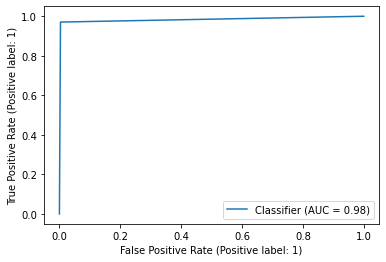

- test set - (positive label = 'M')
[[72  0]
 [ 1 41]]


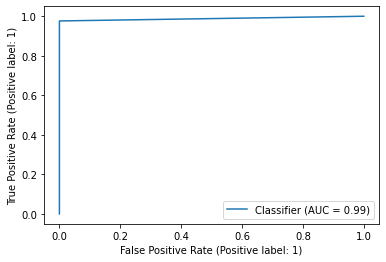

In [136]:
print('ROC curve & confusion matrices: random_state set to 29 \n')
print("- train set - (positive label = 'M')")
CM_train = metrics.confusion_matrix(y_train, preds_train)
print(CM_train)
RocCurveDisplay.from_predictions(lb.fit_transform(y_train),lb.transform(preds_train))
plt.show()

print("- test set - (positive label = 'M')")
CM_test = metrics.confusion_matrix(y_test, preds_test)
print(CM_test)
RocCurveDisplay.from_predictions(lb.fit_transform(y_test),lb.transform(preds_test))
plt.show()

#### 1(b)ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly.

In [3]:
# Semi-Supervised Learning: L1 penalty SVM
accuracy_train_arr, precision_train_arr, recall_train_arr, fscore_train_arr, auc_train_arr = [], [], [], [], [] 
accuracy_test_arr, precision_test_arr, recall_test_arr, fscore_test_arr, auc_test_arr = [], [], [], [], []

for m in range(30):
    
    print("\n---- batch,", m+1, "----")
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=m, stratify=y)
    scaler = preprocessing.StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    
    #label unlabeled split
    X_labeled, X_unlabeled, y_labeled, y_unlabeled = train_test_split(
        X_train_normalized, y_train, test_size=0.5, random_state=m, stratify=y_train)
    
    #parameter selection
    parameters_l1 = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
    svm = LinearSVC(penalty='l1', dual=False, max_iter=100000)
    clf = GridSearchCV(svm, parameters_l1, scoring='accuracy', cv=5, n_jobs=-1)
    clf.fit(X_labeled, y_labeled)
    best_svm = clf.best_estimator_
    best_svm.fit(X_labeled, y_labeled)
    print("  (L1 Penalty SVM) Best estimator:", clf.best_estimator_)
    print("   --score with only labeled samples:", best_svm.score(X_test_normalized, y_test), '\n')
    
    iter_num = y_unlabeled.shape[0]
    for i in range(iter_num):
        confidence_scores = best_svm.decision_function(X_unlabeled)
        distance = np.abs(confidence_scores)
        idx_max = distance.argmax()
    
        #add to labeled set
        X_labeled = np.append(X_labeled,[X_unlabeled[idx_max]], axis=0)
        #M - distance > 0 vs. B - distance < 0
        if(confidence_scores[idx_max] < 0):
            y_labeled = y_labeled.append(pd.Series('B'))
        else:
            y_labeled = y_labeled.append(pd.Series('M'))
    
        #delete from unlabeled set
        X_unlabeled = np.delete(X_unlabeled, idx_max ,0)

        #re-train
        best_svm.fit(X_labeled, y_labeled)
    
    #extra processing
    lb = preprocessing.LabelBinarizer()
    preds_train = best_svm.predict(X_train_normalized)
    preds_test = best_svm.predict(X_test_normalized)
    
    #report for train set
    print("  - train set report -")
    accuracy_train = best_svm.score(X_train_normalized, y_train)
    precision_train, recall_train, fscore_train, _ = precision_recall_fscore_support(y_train, preds_train, average='macro')
    auc_train = roc_auc_score(lb.fit_transform(y_train),lb.transform(preds_train))
    print("    accuracy =", accuracy_train, ", precision =", precision_train, ", recall =", recall_train)
    print("    f1 score =", fscore_train, ", AUC =", auc_train)
    
    #report for test set
    print("  - test set report -")
    accuracy_test = best_svm.score(X_test_normalized, y_test)
    precision_test, recall_test, fscore_test, _ = precision_recall_fscore_support(y_test, preds_test, average='macro')
    auc_test = roc_auc_score(lb.fit_transform(y_test),lb.transform(preds_test))
    print("    accuracy =", accuracy_test, ", precision =", precision_test, ", recall =", recall_test)
    print("    f1 score =", fscore_test, ", AUC =", auc_test)
    
    #metrics record
    accuracy_train_arr.append(accuracy_train)
    precision_train_arr.append(precision_train)
    recall_train_arr.append(recall_train)
    fscore_train_arr.append(fscore_train)
    auc_train_arr.append(auc_train)
    
    accuracy_test_arr.append(accuracy_test)
    precision_test_arr.append(precision_test)
    recall_test_arr.append(recall_test)
    fscore_test_arr.append(fscore_test)
    auc_test_arr.append(auc_test)


---- batch, 1 ----
  (L1 Penalty SVM) Best estimator: LinearSVC(C=0.1, dual=False, max_iter=100000, penalty='l1')
   --score with only labeled samples: 0.9736842105263158 

  - train set report -
    accuracy = 0.9846153846153847 , precision = 0.98662486938349 , recall = 0.9805985552115584
    f1 score = 0.9834652822842311 , AUC = 0.9805985552115584
  - test set report -
    accuracy = 0.9385964912280702 , precision = 0.9323616115296429 , recall = 0.9365079365079365
    f1 score = 0.9343480049362403 , AUC = 0.9365079365079365

---- batch, 2 ----
  (L1 Penalty SVM) Best estimator: LinearSVC(C=0.1, dual=False, max_iter=100000, penalty='l1')
   --score with only labeled samples: 0.956140350877193 

  - train set report -
    accuracy = 0.9758241758241758 , precision = 0.9784540717707371 , recall = 0.9700206398348813
    f1 score = 0.9739514210918023 , AUC = 0.9700206398348813
  - test set report -
    accuracy = 0.956140350877193 , precision = 0.9550618108920814 , recall = 0.950396825396

  - train set report -
    accuracy = 0.9802197802197802 , precision = 0.9773398106014021 , recall = 0.9806501547987616
    f1 score = 0.9789439585357953 , AUC = 0.9806501547987617
  - test set report -
    accuracy = 0.9385964912280702 , precision = 0.929951690821256 , recall = 0.941468253968254
    f1 score = 0.9349474199070678 , AUC = 0.941468253968254

---- batch, 18 ----
  (L1 Penalty SVM) Best estimator: LinearSVC(C=1000, dual=False, max_iter=100000, penalty='l1')
   --score with only labeled samples: 0.9736842105263158 

  - train set report -
    accuracy = 0.9868131868131869 , precision = 0.988337432776087 , recall = 0.9835397316821466
    f1 score = 0.9858449477351916 , AUC = 0.9835397316821466
  - test set report -
    accuracy = 0.9649122807017544 , precision = 0.9672297297297296 , recall = 0.9573412698412699
    f1 score = 0.9619111259605747 , AUC = 0.9573412698412699

---- batch, 19 ----
  (L1 Penalty SVM) Best estimator: LinearSVC(C=0.1, dual=False, max_iter=100000, pena

In [4]:
print("Semi-Supervised (L1 Penalty SVM) Averages over 30 runs")
print("- train set -")
print("  average accuracy =", sum(accuracy_train_arr)/len(accuracy_train_arr))
print("  average precision =", sum(precision_train_arr)/len(precision_train_arr))
print("  average recall =", sum(recall_train_arr)/len(recall_train_arr))
print("  average f1 score =", sum(fscore_train_arr)/len(fscore_train_arr))
print("  average AUC =", sum(auc_train_arr)/len(auc_train_arr))
print("- test set -")
print("  average accuracy =", sum(accuracy_test_arr)/len(accuracy_test_arr))
print("  average precision =", sum(precision_test_arr)/len(precision_test_arr))
print("  average recall =", sum(recall_test_arr)/len(recall_test_arr))
print("  average f1 score =", sum(fscore_test_arr)/len(fscore_test_arr))
print("  average AUC =", sum(auc_test_arr)/len(auc_test_arr))

Semi-Supervised (L1 Penalty SVM) Averages over 30 runs
- train set -
  average accuracy = 0.9776556776556777
  average precision = 0.978372734907757
  average recall = 0.9740540075679395
  average f1 score = 0.9760246991640268
  average AUC = 0.9740540075679396
- test set -
  average accuracy = 0.9628654970760232
  average precision = 0.9638387558168456
  average recall = 0.9568783068783068
  average f1 score = 0.9598123966750568
  average AUC = 0.9568783068783068


ROC curve & confusion matrices: random_state set to 29 

- train set - (positive label = 'M')
[[273  12]
 [  6 164]]


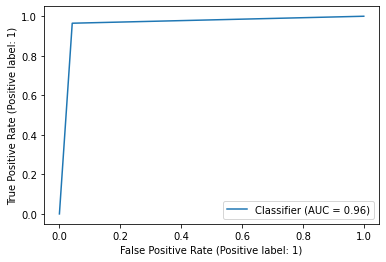

- test set - (positive label = 'M')
[[71  1]
 [ 0 42]]


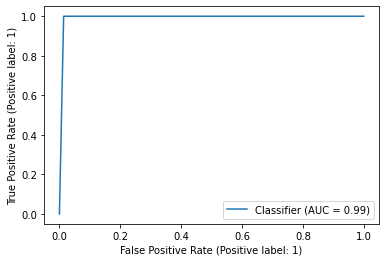

In [5]:
print('ROC curve & confusion matrices: random_state set to 29 \n')
print("- train set - (positive label = 'M')")
CM_train = metrics.confusion_matrix(y_train, preds_train)
print(CM_train)
RocCurveDisplay.from_predictions(lb.fit_transform(y_train),lb.transform(preds_train))
plt.show()

print("- test set - (positive label = 'M')")
CM_test = metrics.confusion_matrix(y_test, preds_test)
print(CM_test)
RocCurveDisplay.from_predictions(lb.fit_transform(y_test),lb.transform(preds_test))
plt.show()

#### 1(b)iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

#### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

- control the max_iter
- use stratify to include both classes

In [89]:
# Unsupervised Learning: kmeans
accuracy_train_arr, precision_train_arr, recall_train_arr, fscore_train_arr, auc_train_arr = [], [], [], [], [] 
accuracy_test_arr, precision_test_arr, recall_test_arr, fscore_test_arr, auc_test_arr = [], [], [], [], []

for m in range(30):
    print("\n---- batch,", m+1, "----")
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=m, stratify=y)
    X_train, y_train = np.array(X_train), np.array(y_train)
    X_test, y_test = np.array(X_test), np.array(y_test)
    
    #kmeans
    kmeans = KMeans(n_clusters=2, init='random', max_iter=10000, random_state=m).fit(X_train)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    
    cluster0_idx_arr, cluster1_idx_arr = np.where(labels==0), np.where(labels==1)
    distances_0, distances_1 = np.array([]), np.array([])
    true_label_0, true_label_1 = np.array([]), np.array([])
    
    #decide cluster label
    for i in cluster0_idx_arr[0]:
        dist = np.linalg.norm(X_train[i] - centers[0])
        distances_0 = np.append(distances_0, dist)
        true_label_0 = np.append(true_label_0, y_train[i])  
    closest30_0 = true_label_0[np.argsort(distances_0)[:30]]
    
    for i in cluster1_idx_arr[0]:
        dist = np.linalg.norm(X_train[i] - centers[1])
        distances_1 = np.append(distances_1, dist)
        true_label_1 = np.append(true_label_1, y_train[i])
    closest30_1 = true_label_1[np.argsort(distances_1)[:30]]
    
    cluster0_m_cnt = 0
    for i in range(30):
        if closest30_0[i]=='M':
            cluster0_m_cnt = cluster0_m_cnt + 1
    if cluster0_m_cnt > 15: 
        cluster_label_0 = 'M'
        cluster_label_1 = 'B'
    else:
        cluster_label_0 = 'B'
        cluster_label_1 = 'M'
    
    #make preds arr according to cluster labels
    preds_train, preds_test = [], []
    for i in range(labels.shape[0]):
        if labels[i] == 0:
            preds_train.append(cluster_label_0)
        else:
            preds_train.append(cluster_label_1)
            
    test_labels = kmeans.predict(X_test)
    for i in range(test_labels.shape[0]):
        if test_labels[i] == 0:
            preds_test.append(cluster_label_0)
        else:
            preds_test.append(cluster_label_1)
    
    lb = preprocessing.LabelBinarizer()
    
    #report for train set
    print("  - train set report -")
    accuracy_train = accuracy_score(y_train, preds_train)
    precision_train, recall_train, fscore_train, _ = precision_recall_fscore_support(y_train, preds_train, average='macro')
    auc_train = roc_auc_score(lb.fit_transform(y_train),lb.transform(preds_train))
    print("    accuracy =", accuracy_train, ", precision =", precision_train, ", recall =", recall_train)
    print("    f1 score =", fscore_train, ", AUC =", auc_train)
    
    #report for test set
    print("  - test set report -")
    accuracy_test = accuracy_score(y_test, preds_test)
    precision_test, recall_test, fscore_test, _ = precision_recall_fscore_support(y_test, preds_test, average='macro')
    auc_test = roc_auc_score(lb.fit_transform(y_test),lb.transform(preds_test))
    print("    accuracy =", accuracy_test, ", precision =", precision_test, ", recall =", recall_test)
    print("    f1 score =", fscore_test, ", AUC =", auc_test)
    
    #metrics record
    accuracy_train_arr.append(accuracy_train)
    precision_train_arr.append(precision_train)
    recall_train_arr.append(recall_train)
    fscore_train_arr.append(fscore_train)
    auc_train_arr.append(auc_train)
    
    accuracy_test_arr.append(accuracy_test)
    precision_test_arr.append(precision_test)
    recall_test_arr.append(recall_test)
    fscore_test_arr.append(fscore_test)
    auc_test_arr.append(auc_test)


---- batch, 1 ----
  - train set report -
    accuracy = 0.8461538461538461 , precision = 0.8973643281675276 , recall = 0.7953044375644995
    f1 score = 0.8164645952424857 , AUC = 0.7953044375644995
  - test set report -
    accuracy = 0.8859649122807017 , precision = 0.9235294117647059 , recall = 0.8452380952380952
    f1 score = 0.8670494303400018 , AUC = 0.8452380952380952

---- batch, 2 ----
  - train set report -
    accuracy = 0.8263736263736263 , precision = 0.8868888492841442 , recall = 0.7688338493292053
    f1 score = 0.7887588812947737 , AUC = 0.7688338493292053
  - test set report -
    accuracy = 0.8771929824561403 , precision = 0.9186046511627908 , recall = 0.8333333333333333
    f1 score = 0.8556962025316456 , AUC = 0.8333333333333333

---- batch, 3 ----
  - train set report -
    accuracy = 0.8263736263736263 , precision = 0.8914835164835164 , recall = 0.7676470588235293
    f1 score = 0.7877961378838059 , AUC = 0.7676470588235293
  - test set report -
    accuracy = 

  - train set report -
    accuracy = 0.8483516483516483 , precision = 0.898554721977052 , recall = 0.7982456140350878
    f1 score = 0.8194662480376766 , AUC = 0.7982456140350878
  - test set report -
    accuracy = 0.8245614035087719 , precision = 0.8913043478260869 , recall = 0.7619047619047619
    f1 score = 0.7827743902439026 , AUC = 0.7619047619047619

---- batch, 24 ----
  - train set report -
    accuracy = 0.8571428571428571 , precision = 0.9071428571428571 , recall = 0.8088235294117647
    f1 score = 0.8306370794559771 , AUC = 0.8088235294117647
  - test set report -
    accuracy = 0.8421052631578947 , precision = 0.8841783216783217 , recall = 0.7906746031746033
    f1 score = 0.8113970588235294 , AUC = 0.7906746031746033

---- batch, 25 ----
  - train set report -
    accuracy = 0.8461538461538461 , precision = 0.8973643281675276 , recall = 0.7953044375644995
    f1 score = 0.8164645952424857 , AUC = 0.7953044375644995
  - test set report -
    accuracy = 0.8859649122807017 

In [90]:
print("Unsupervised (k-means) Averages over 30 runs")
print("- train set -")
print("  average accuracy =", sum(accuracy_train_arr)/len(accuracy_train_arr))
print("  average precision =", sum(precision_train_arr)/len(precision_train_arr))
print("  average recall =", sum(recall_train_arr)/len(recall_train_arr))
print("  average f1 score =", sum(fscore_train_arr)/len(fscore_train_arr))
print("  average AUC =", sum(auc_train_arr)/len(auc_train_arr))
print("- test set -")
print("  average accuracy =", sum(accuracy_test_arr)/len(accuracy_test_arr))
print("  average precision =", sum(precision_test_arr)/len(precision_test_arr))
print("  average recall =", sum(recall_test_arr)/len(recall_test_arr))
print("  average f1 score =", sum(fscore_test_arr)/len(fscore_test_arr))
print("  average AUC =", sum(auc_test_arr)/len(auc_test_arr))

Unsupervised (k-means) Averages over 30 runs
- train set -
  average accuracy = 0.8495970695970699
  average precision = 0.8996859345540785
  average recall = 0.7997936016511871
  average f1 score = 0.820946002462972
  average AUC = 0.7997936016511871
- test set -
  average accuracy = 0.8540935672514619
  average precision = 0.9049185953994311
  average recall = 0.8024801587301589
  average f1 score = 0.8244348383054144
  average AUC = 0.8024801587301589


ROC curve & confusion matrices: random_state set to 29 

- train set - (positive label = 'M')
[[284   1]
 [ 71  99]]


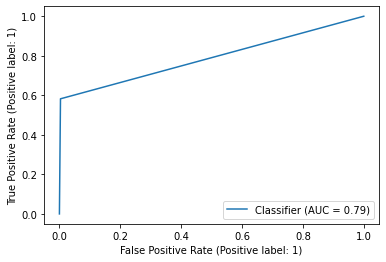

- test set - (positive label = 'M')
[[72  0]
 [12 30]]


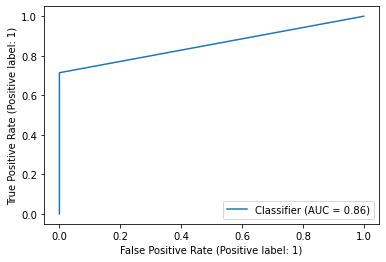

In [91]:
print('ROC curve & confusion matrices: random_state set to 29 \n')
print("- train set - (positive label = 'M')")
CM_train = metrics.confusion_matrix(y_train, preds_train)
print(CM_train)
RocCurveDisplay.from_predictions(lb.fit_transform(y_train),lb.transform(preds_train))
plt.show()

print("- test set - (positive label = 'M')")
CM_test = metrics.confusion_matrix(y_test, preds_test)
print(CM_test)
RocCurveDisplay.from_predictions(lb.fit_transform(y_test),lb.transform(preds_test))
plt.show()

#### 1(b)v. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clus- tering based on kernels.3 Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit − predict method.

In [13]:
# Unsupervised Learning: spectral clustering
accuracy_train_arr, precision_train_arr, recall_train_arr, fscore_train_arr, auc_train_arr = [], [], [], [], [] 
accuracy_test_arr, precision_test_arr, recall_test_arr, fscore_test_arr, auc_test_arr = [], [], [], [], []

for m in range(30):
    print("\n---- batch,", m+1, "----")
    
    #train test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=m, stratify=y)
    scaler = preprocessing.StandardScaler()
    X_train_normalized = scaler.fit_transform(X_train)
    X_test_normalized = scaler.transform(X_test)
    X_train_normalized, y_train = np.array(X_train_normalized), np.array(y_train)
    X_test_normalized, y_test = np.array(X_test_normalized), np.array(y_test)
    
    #spectral clustering
    clustering = SpectralClustering(n_clusters=2, affinity='rbf', gamma=1.0).fit(X_train_normalized)
    labels_train = clustering.labels_
    labels_test = clustering.fit_predict(X_test_normalized)
    
    #record preds arr according to cluster labels
    preds_train, preds_test = [], []
    for i in range(labels_train.shape[0]):
        if labels_train[i] == 0:
            preds_train.append('B')
        else:
            preds_train.append('M')
            
    for i in range(labels_test.shape[0]):
        if labels_test[i] == 0:
            preds_test.append('B')
        else:
            preds_test.append('M')
    
    lb = preprocessing.LabelBinarizer()
    
    #report for train set
    print("  - train set report -")
    accuracy_train = accuracy_score(y_train, preds_train)
    precision_train, recall_train, fscore_train, _ = precision_recall_fscore_support(y_train, preds_train, average='macro')
    auc_train = roc_auc_score(lb.fit_transform(y_train),lb.transform(preds_train))
    print("    accuracy =", accuracy_train, ", precision =", precision_train, ", recall =", recall_train)
    print("    f1 score =", fscore_train, ", AUC =", auc_train)
    
    #report for test set
    print("  - test set report -")
    accuracy_test = accuracy_score(y_test, preds_test)
    precision_test, recall_test, fscore_test, _ = precision_recall_fscore_support(y_test, preds_test, average='macro')
    auc_test = roc_auc_score(lb.fit_transform(y_test),lb.transform(preds_test))
    print("    accuracy =", accuracy_test, ", precision =", precision_test, ", recall =", recall_test)
    print("    f1 score =", fscore_test, ", AUC =", auc_test)
    
    #metrics record
    accuracy_train_arr.append(accuracy_train)
    precision_train_arr.append(precision_train)
    recall_train_arr.append(recall_train)
    fscore_train_arr.append(fscore_train)
    auc_train_arr.append(auc_train)
    
    accuracy_test_arr.append(accuracy_test)
    precision_test_arr.append(precision_test)
    recall_test_arr.append(recall_test)
    fscore_test_arr.append(fscore_test)
    auc_test_arr.append(auc_test)
    


---- batch, 1 ----
  - train set report -
    accuracy = 0.6307692307692307 , precision = 0.814569536423841 , recall = 0.5058823529411764
    f1 score = 0.39780676876536214 , AUC = 0.5058823529411764
  - test set report -
    accuracy = 0.9210526315789473 , precision = 0.9444444444444444 , recall = 0.8928571428571428
    f1 score = 0.9105882352941177 , AUC = 0.8928571428571428

---- batch, 2 ----
  - train set report -
    accuracy = 0.6285714285714286 , precision = 0.8138766519823788 , recall = 0.5029411764705882
    f1 score = 0.39150424550324847 , AUC = 0.5029411764705882
  - test set report -
    accuracy = 0.6403508771929824 , precision = 0.8185840707964602 , recall = 0.5119047619047619
    f1 score = 0.4124450031426775 , AUC = 0.5119047619047619

---- batch, 3 ----
  - train set report -
    accuracy = 0.6307692307692307 , precision = 0.814569536423841 , recall = 0.5058823529411764
    f1 score = 0.39780676876536214 , AUC = 0.5058823529411764
  - test set report -
    accuracy =

  - train set report -
    accuracy = 0.6307692307692307 , precision = 0.814569536423841 , recall = 0.5058823529411764
    f1 score = 0.39780676876536214 , AUC = 0.5058823529411764
  - test set report -
    accuracy = 0.6228070175438597 , precision = 0.3141592920353982 , recall = 0.4930555555555556
    f1 score = 0.3837837837837838 , AUC = 0.4930555555555556

---- batch, 24 ----
  - train set report -
    accuracy = 0.6285714285714286 , precision = 0.8138766519823788 , recall = 0.5029411764705882
    f1 score = 0.39150424550324847 , AUC = 0.5029411764705882
  - test set report -
    accuracy = 0.6403508771929824 , precision = 0.8185840707964602 , recall = 0.5119047619047619
    f1 score = 0.4124450031426775 , AUC = 0.5119047619047619

---- batch, 25 ----
  - train set report -
    accuracy = 0.6285714285714286 , precision = 0.8138766519823788 , recall = 0.5029411764705882
    f1 score = 0.39150424550324847 , AUC = 0.5029411764705882
  - test set report -
    accuracy = 0.64035087719298

In [14]:
print("Unsupervised (spectral clustering) Averages over 30 runs")
print("- train set -")
print("  average accuracy =", sum(accuracy_train_arr)/len(accuracy_train_arr))
print("  average precision =", sum(precision_train_arr)/len(precision_train_arr))
print("  average recall =", sum(recall_train_arr)/len(recall_train_arr))
print("  average f1 score =", sum(fscore_train_arr)/len(fscore_train_arr))
print("  average AUC =", sum(auc_train_arr)/len(auc_train_arr))
print("- test set -")
print("  average accuracy =", sum(accuracy_test_arr)/len(accuracy_test_arr))
print("  average precision =", sum(precision_test_arr)/len(precision_test_arr))
print("  average recall =", sum(recall_test_arr)/len(recall_test_arr))
print("  average f1 score =", sum(fscore_test_arr)/len(fscore_test_arr))
print("  average AUC =", sum(auc_test_arr)/len(auc_test_arr))

Unsupervised (spectral clustering) Averages over 30 runs
- train set -
  average accuracy = 0.6293040293040292
  average precision = 0.7641360581925682
  average recall = 0.5040402476780187
  average f1 score = 0.3941454779241114
  average AUC = 0.5040402476780187
- test set -
  average accuracy = 0.6488304093567252
  average precision = 0.6884797082338312
  average recall = 0.526388888888889
  average f1 score = 0.43719635694527165
  average AUC = 0.526388888888889


ROC curve & confusion matrices: random_state set to 29 

- train set - (positive label = 'M')
[[285   0]
 [169   1]]


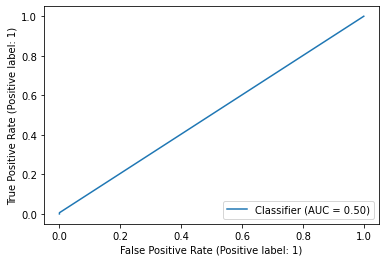

- test set - (positive label = 'M')
[[72  0]
 [41  1]]


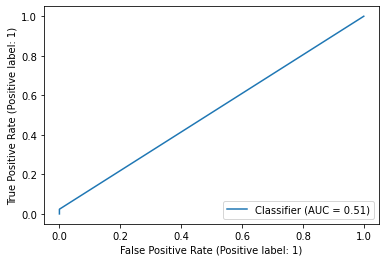

In [15]:
print('ROC curve & confusion matrices: random_state set to 29 \n')
print("- train set - (positive label = 'M')")
CM_train = metrics.confusion_matrix(y_train, preds_train)
print(CM_train)
RocCurveDisplay.from_predictions(lb.fit_transform(y_train),lb.transform(preds_train))
plt.show()

print("- test set - (positive label = 'M')")
CM_test = metrics.confusion_matrix(y_test, preds_test)
print(CM_test)
RocCurveDisplay.from_predictions(lb.fit_transform(y_test),lb.transform(preds_test))
plt.show()


#### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

- Overall supervised and semi-supervised learning worked way better than unsupervised learning on this problem. supervised SVM has a better training score than semi-superbised SVM, but the two resulted in similar testing scores.

- unsupervised: k-means clustering obtained acceptable results(an accuracy of 85%), while spectral clustering along performed badly. 

### 2. Active Learning Using Support Vector Machines

In [136]:
bank = pd.read_csv('../data/data_banknote_authentication.txt',names=[1,2,3,4,'label'])
X = bank.iloc[:,:4]
y = bank['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=472/1372, random_state=10, stratify=y)
scaler = preprocessing.StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index)
y_train = pd.DataFrame(y_train, index=y_train.index)
y_test = pd.DataFrame(y_test, index=y_test.index)

#### 2(b)i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 5-fold cross validation.4 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [138]:
test_errors_df = []
for m in range(50):
    pool_X, pool_y = pd.DataFrame(), pd.DataFrame()
    X_train_tmp, y_train_tmp = X_train, y_train
    test_errors = []
    
    for i in range(90):
        #randomly select 10 samples
        sample_X = X_train_tmp.sample(n=10)
        sample_y = y_train_tmp.loc[sample_X.index]
    
        #add to the pool
        pool_X, pool_y = pd.concat([pool_X, sample_X]), pd.concat([pool_y, sample_y])
   
        #drop samples from remains
        X_train_tmp, y_train_tmp = X_train_tmp.drop(sample_X.index), y_train_tmp.drop(sample_X.index)
    
        #svm
        parameters_l1 = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
        svm = LinearSVC(penalty='l1', dual=False, max_iter=1000000)
        cv_fold = 5
        if(pool_y.shape[0]<20):
            cv_fold = 2
        clf = GridSearchCV(svm, parameters_l1, scoring='accuracy', cv=cv_fold, n_jobs=-1)
        clf.fit(pool_X, pool_y.values.ravel())
        best_svm = clf.best_estimator_
        best_svm.fit(pool_X, pool_y.values.ravel())
        test_error = 1 - best_svm.score(X_test, y_test)
        test_errors.append(test_error)
        #print("   -- test error w",pool_y.shape[0], "samples in the pool:", test_error)
    
    test_errors_df.append(test_errors)

In [139]:
passive_test_errors = pd.DataFrame(test_errors_df)
passive_test_errors

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.021186,0.031780,0.027542,0.025424,0.025424,0.027542,0.025424,0.023305,0.023305,0.023305,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
1,0.025424,0.063559,0.046610,0.040254,0.033898,0.029661,0.029661,0.021186,0.025424,0.025424,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
2,0.063559,0.025424,0.023305,0.023305,0.023305,0.021186,0.033898,0.025424,0.031780,0.031780,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
3,0.091102,0.038136,0.031780,0.029661,0.027542,0.012712,0.029661,0.025424,0.023305,0.023305,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.012712,0.012712,0.012712
4,0.110169,0.029661,0.025424,0.029661,0.027542,0.027542,0.023305,0.031780,0.025424,0.029661,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.012712,0.012712,0.012712,0.012712
5,0.031780,0.040254,0.029661,0.027542,0.023305,0.023305,0.029661,0.023305,0.029661,0.023305,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
6,0.182203,0.057203,0.036017,0.036017,0.029661,0.036017,0.021186,0.021186,0.021186,0.021186,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
7,0.148305,0.055085,0.031780,0.040254,0.029661,0.025424,0.027542,0.029661,0.029661,0.029661,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.012712,0.012712,0.012712,0.010593,0.010593
8,0.201271,0.029661,0.031780,0.025424,0.027542,0.025424,0.021186,0.021186,0.023305,0.029661,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593
9,0.105932,0.052966,0.038136,0.031780,0.033898,0.023305,0.042373,0.031780,0.025424,0.016949,...,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593


#### 2(b)ii. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the parameters of the SVM with 5-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM6 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

In [165]:
test_errors_df = []
for m in range(50):
    pool_X, pool_y = pd.DataFrame(), pd.DataFrame()
    X_train_tmp, y_train_tmp = X_train, y_train
    test_errors = []
    
    for i in range(90):
        #select 10 samples
        if i==0:
            sample_X = X_train_tmp.sample(n=10,random_state=m)
            sample_y = y_train_tmp.loc[sample_X.index]
        else:
            distances = best_svm.decision_function(X_train_tmp)
            closest_indexes = np.argsort(abs(distances))[:10]
            sample_X = X_train_tmp.iloc[closest_indexes]
            sample_y = y_train_tmp.iloc[closest_indexes]
            
        #add to the pool
        pool_X, pool_y = pd.concat([pool_X, sample_X]), pd.concat([pool_y, sample_y])
   
        #drop samples from remains
        X_train_tmp, y_train_tmp = X_train_tmp.drop(sample_X.index), y_train_tmp.drop(sample_X.index)
    
        #svm
        parameters_l1 = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
        svm = LinearSVC(penalty='l1', dual=False, max_iter=1000000)
        cv_fold = 5
        if(pool_y.shape[0]<30):
            cv_fold = 2
        clf = GridSearchCV(svm, parameters_l1, scoring='accuracy', cv=cv_fold, n_jobs=-1)
        clf.fit(pool_X, pool_y.values.ravel())
        best_svm = clf.best_estimator_
        best_svm.fit(pool_X, pool_y.values.ravel())
        test_error = 1 - best_svm.score(X_test, y_test)
        test_errors.append(test_error)
        #print("   -- test error w",pool_y.shape[0], "samples in the pool:", test_error)
    
    test_errors_df.append(test_errors)

In [161]:
active_test_errors = pd.DataFrame(test_errors_df)
active_test_errors

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,0.031780,0.444915,0.023305,0.014831,0.012712,0.010593,0.010593,0.010593,0.012712,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.010593,0.010593,0.012712,0.012712,0.012712,0.010593
1,0.036017,0.021186,0.023305,0.016949,0.023305,0.010593,0.012712,0.012712,0.012712,0.010593,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
2,0.194915,0.040254,0.031780,0.010593,0.010593,0.010593,0.010593,0.010593,0.010593,0.008475,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
3,0.444915,0.038136,0.014831,0.010593,0.010593,0.012712,0.010593,0.010593,0.010593,0.010593,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
4,0.027542,0.008475,0.010593,0.012712,0.010593,0.010593,0.010593,0.012712,0.010593,0.010593,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
5,0.139831,0.137712,0.078390,0.029661,0.023305,0.014831,0.012712,0.012712,0.010593,0.012712,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.010593,0.010593,0.012712
6,0.131356,0.152542,0.036017,0.023305,0.014831,0.008475,0.008475,0.010593,0.010593,0.010593,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
7,0.082627,0.444915,0.027542,0.027542,0.010593,0.014831,0.010593,0.012712,0.012712,0.010593,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
8,0.137712,0.048729,0.025424,0.010593,0.023305,0.008475,0.010593,0.010593,0.010593,0.008475,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712
9,0.169492,0.088983,0.040254,0.050847,0.010593,0.008475,0.008475,0.010593,0.012712,0.010593,...,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712,0.012712


#### 2(c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

- Passive learning started to work better than active learning when the size of the train set is very small.
- However, error rates of active learning dropped faster while the training size increased.
- They ended up equally well when all samples were added to the training set.
- It is pointless to select 10 closest samples when the training size is too small, but we may consider combine the two approach together: Firstly PASSSIVE, then ACTIVE when the training size growed to certain threshold.
- (note: possible reason for the bump on the curve of active learning might be those poorly selected initial samples. They might not included both classes.)

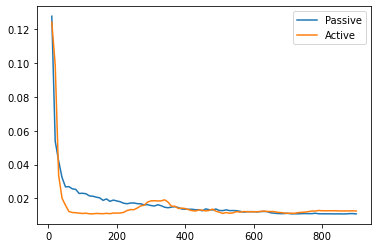

In [162]:
plt.plot([i*10 for i in range(1,91)], passive_test_errors.mean(),label='Passive')
plt.plot([i*10 for i in range(1,91)], active_test_errors.mean(), label='Active')
plt.legend()
plt.show()